In [4]:
from setup import *
from charts_and_processing import *
%matplotlib inline

In [5]:
# setup.file_pre_processing()

In [6]:
crime_data = pd.read_csv('crime_data_post_processing.csv', index_col=0)
hospitals = pd.read_csv('hospitals_data_post_processing.csv', index_col=0)

In [7]:
hospitals = clean_drop_data_hospitals(hospitals)
crime_data = clean_drop_data_crime(crime_data)


/Users/elainatiller1/Desktop/SI330/final_project_330/charts_and_processing.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['lat_long'] = crime_data['lat_long'].apply(lambda x : ast.literal_eval(x))


In [10]:
hospitals.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Patient experience national comparison,Effectiveness of care national comparison,full_address,lat_long,county,distance_in_miles,num_mortality_comparision
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,Same as the national average,Below the national average,Same as the national average,1108 ROSS CLARK CIRCLE DOTHAN AL 36301,"(31.216402000000002, -85.36564064472296)","Houston County, AL",8.140765,1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,Below the national average,Same as the national average,205 MARENGO STREET FLORENCE AL 35631,"(34.7946245, -87.68303582998244)","Lauderdale County, AL",7.637646,0
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,Same as the national average,Same as the national average,Below the national average,702 N MAIN ST OPP AL 36467,"(31.2928787, -86.25490030241093)","Covington County, AL",13.809160,1
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,Acute Care Hospitals,Proprietary,Yes,3,Same as the national average,Not Available,Same as the national average,101 HOSPITAL CIRCLE LUVERNE AL 36049,"(31.6937493, -86.26470160380265)","Crenshaw County, AL",3.619856,1
5,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,Same as the national average,Below the national average,Below the national average,50 MEDICAL PARK EAST DRIVE BIRMINGHAM AL 35235,"(33.595315299999996, -86.66763066940506)","Jefferson County, GA",9.474224,1


In [11]:
crime_data.head()

,county_name,crime_rate_per_100000,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,population,lat_long
0,"St. Louis city, MO",1791.995377,119,200,1778,3609,4995,13791,318416,"(29.6993748, -91.20677)"
1,"Crittenden County, AR",1754.914968,8,38,165,662,1482,1753,49746,"(35.2505701, -90.3192299)"
2,"Alexander County, IL",1664.700485,1,2,5,119,82,184,7629,"(37.1801529, -89.3502834)"
3,"Kenedy County, TX",1456.310680,0,3,1,2,5,4,412,"(27.221984, -97.79136)"
4,"De Soto Parish, LA",1447.402430,3,4,17,368,149,494,27083,"(31.901498, -93.670989)"


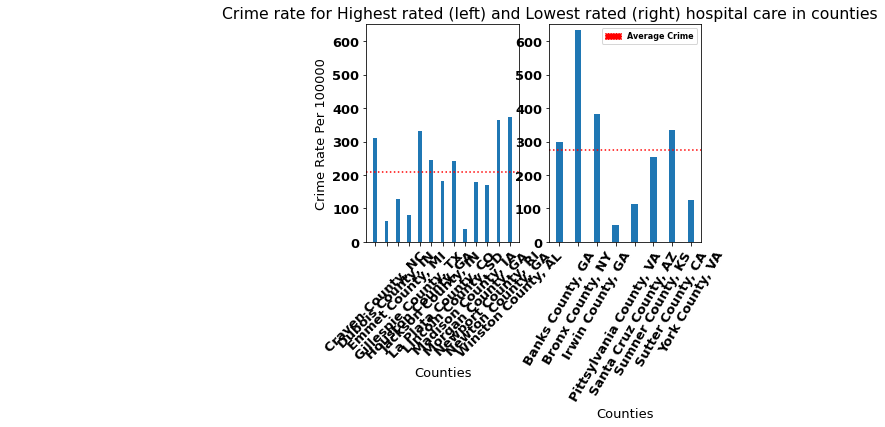

In [8]:
# 18.2s: %timeit hospitals['county'], hospitals['distance_in_miles'] = zip(*hospitals['lat_long'].map(find_hospital_closest_county))
# 18.2s: %timeit hospitals['county'], hospitals['distance_in_miles'] = zip(*hospitals['lat_long'].apply(find_hospital_closest_county))
# 17.7s:
hospitals['county'], hospitals['distance_in_miles'] = zip(*hospitals['lat_long'].apply(lambda x : find_hospital_closest_county(x,crime_data)))
hospitals = hospitals.drop(hospitals[hospitals['distance_in_miles'] > 50].index)


crime_vs_care_chart(hospitals, crime_data)

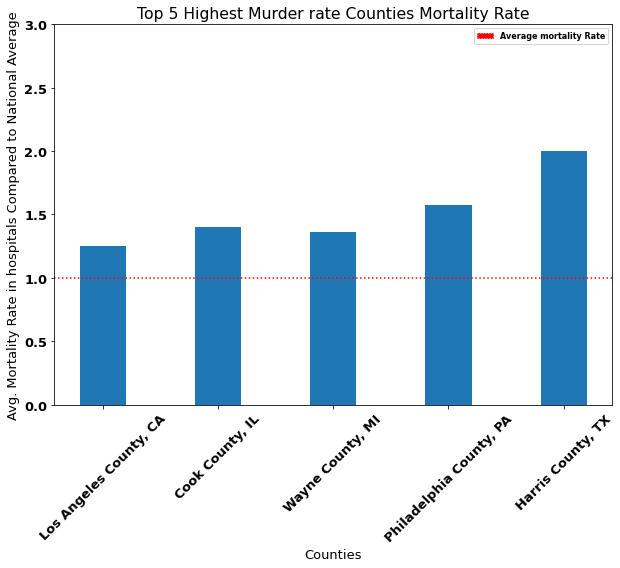

In [9]:
mortality_murder_chart(crime_data, hospitals)